# PRCP-1021-InsCostPred

## Problem Statement

### Dataset Description 

## Business case : To predict the insurance price charged to the customer

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
#Loading the data
insurance_dataset = pd.read_csv('.\Data\datasets_13720_18513_insurance(1).csv')

### Basic checks

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
insurance_dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
insurance_dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Observations from Basic checks:
1. No missing values in insurance_dataset
2. sex, smoker and region are categorical columns

## Exploratory data analysis

### Univariate Analysis 

                                             |                                             | [  0%]   00:00 ->…


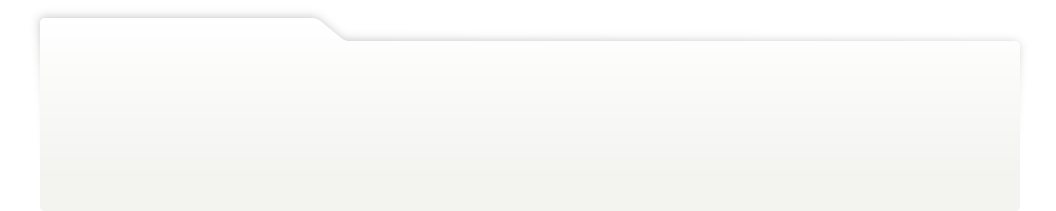
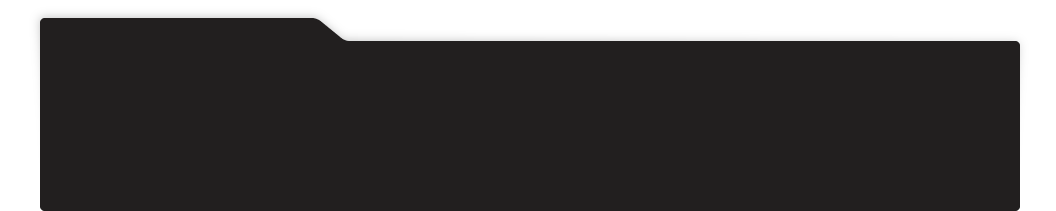
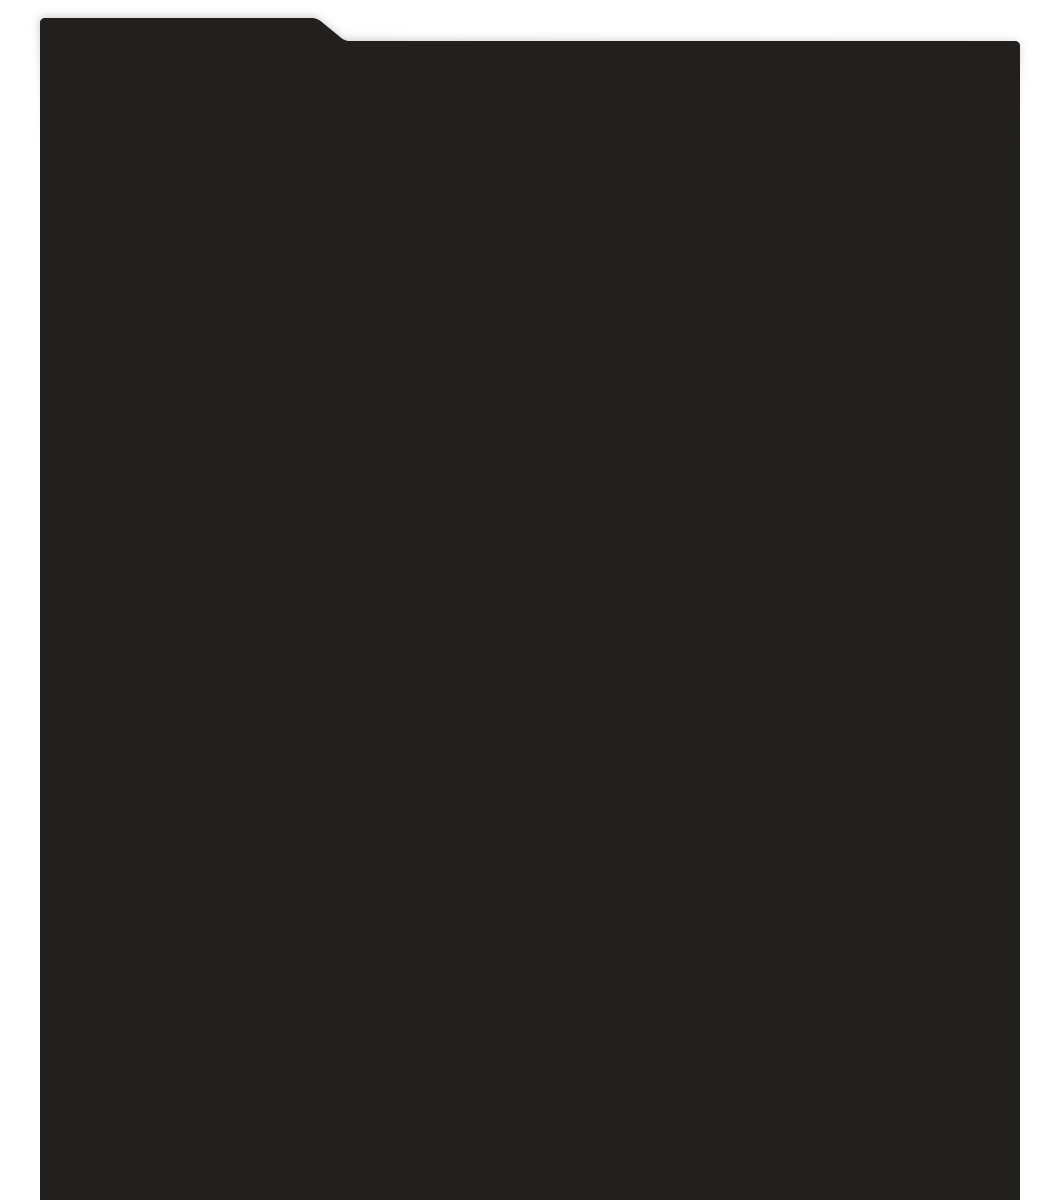
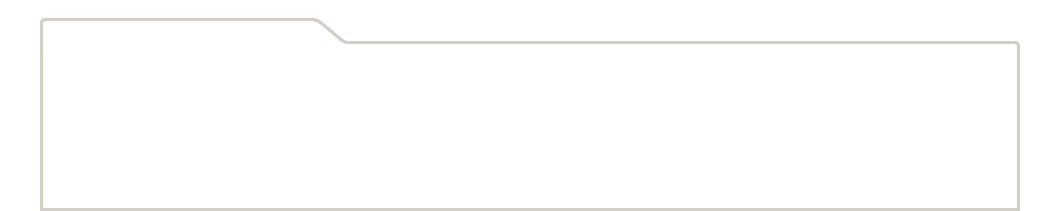
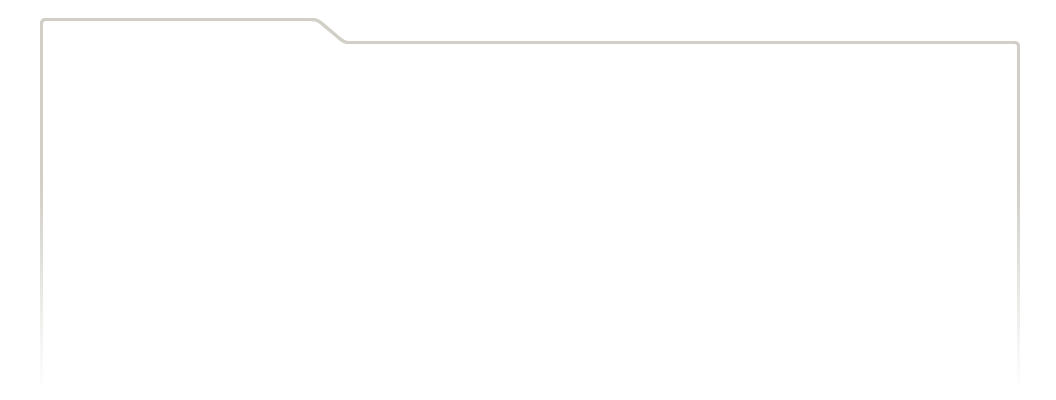
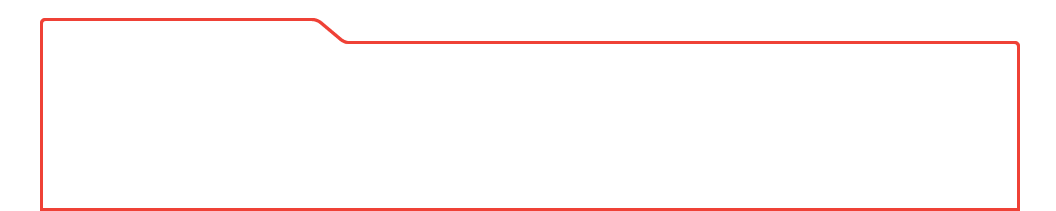
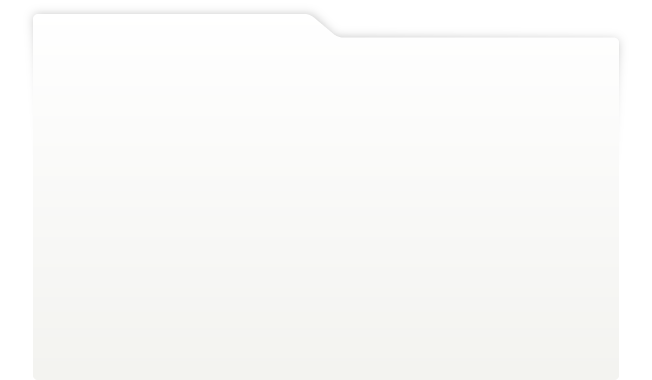
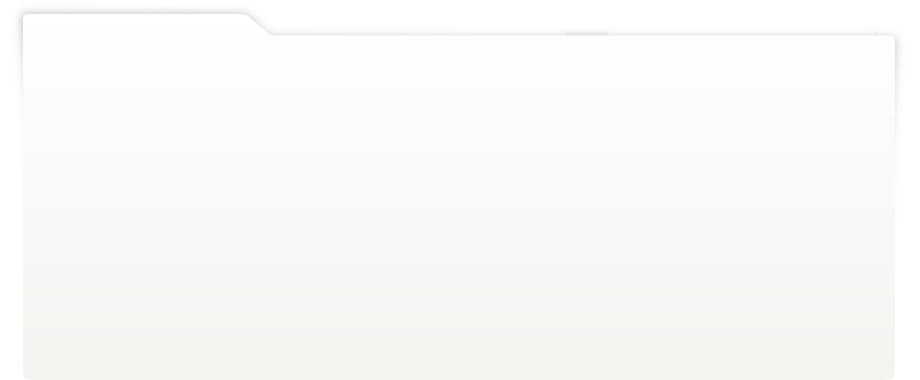
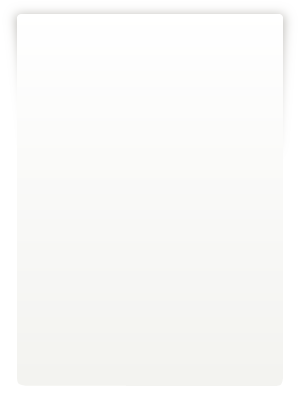
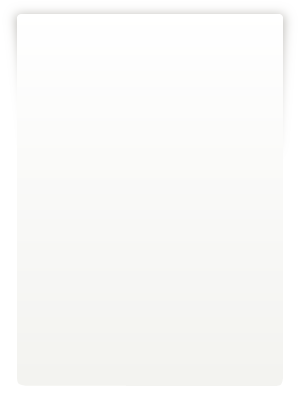
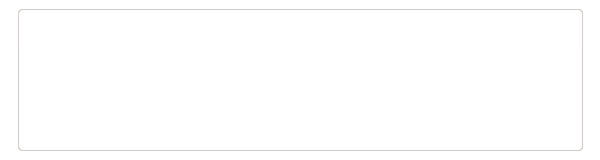
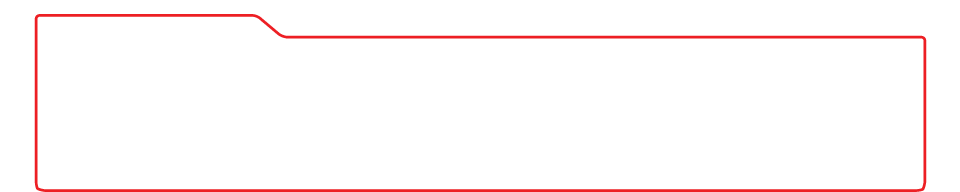
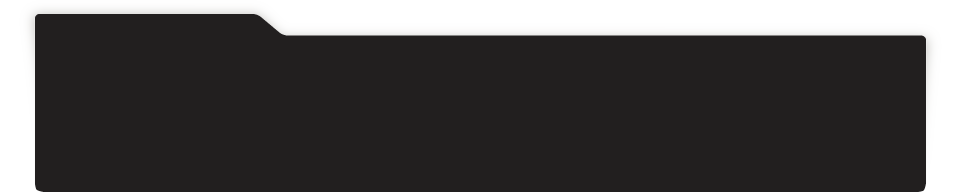
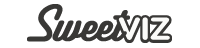
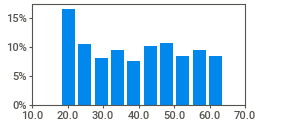
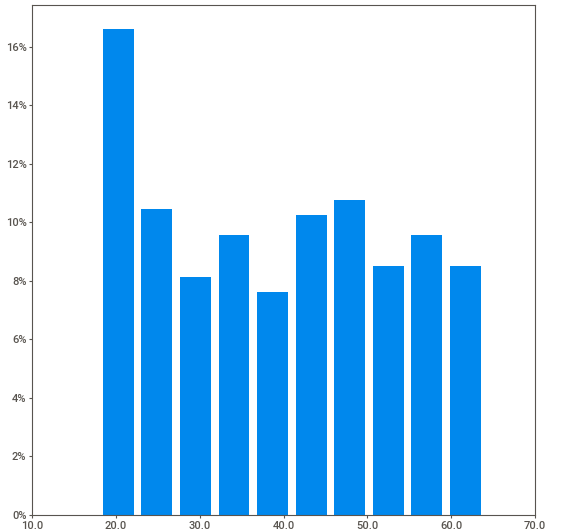
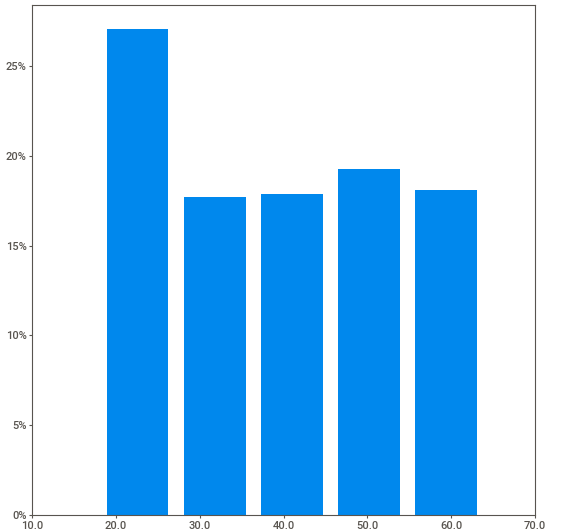
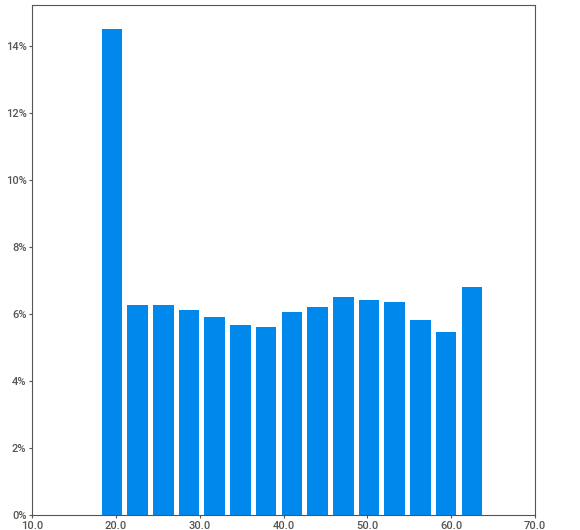
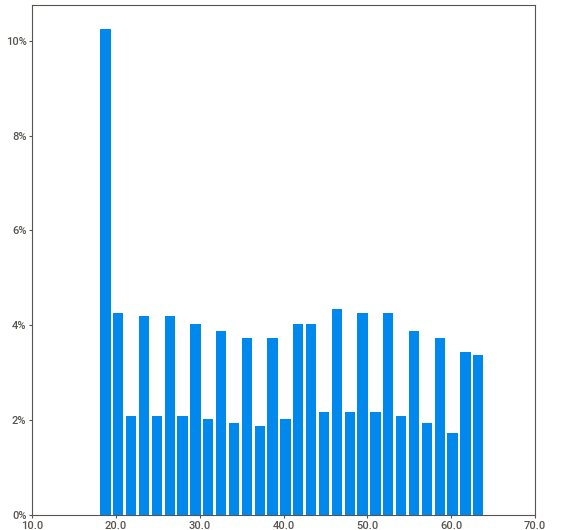
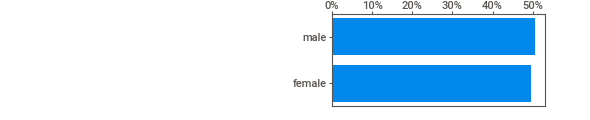
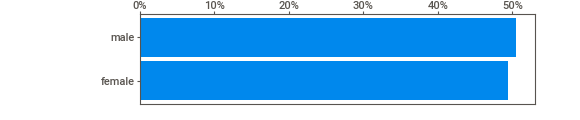
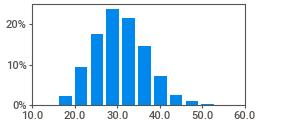
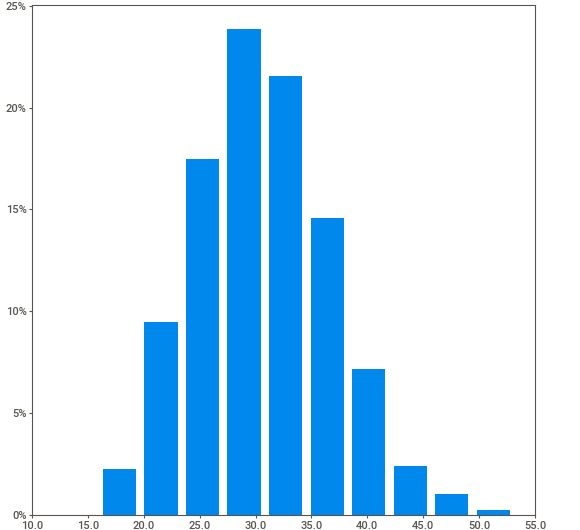
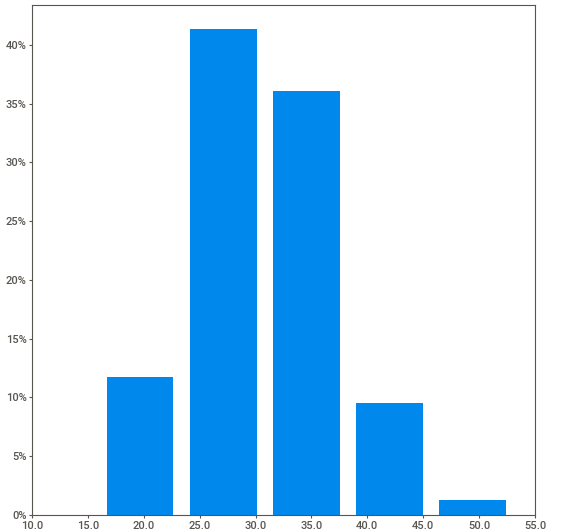
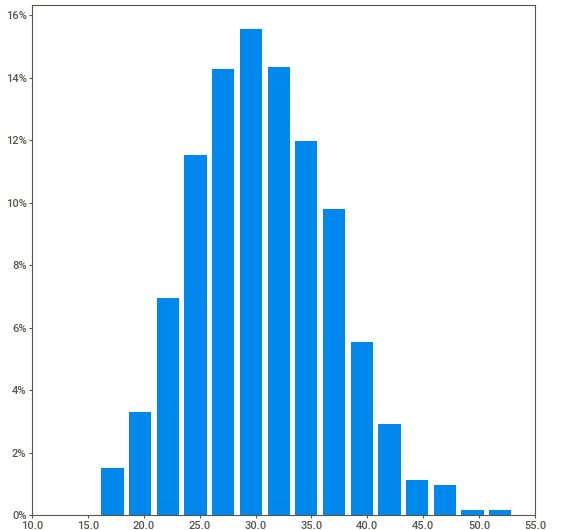
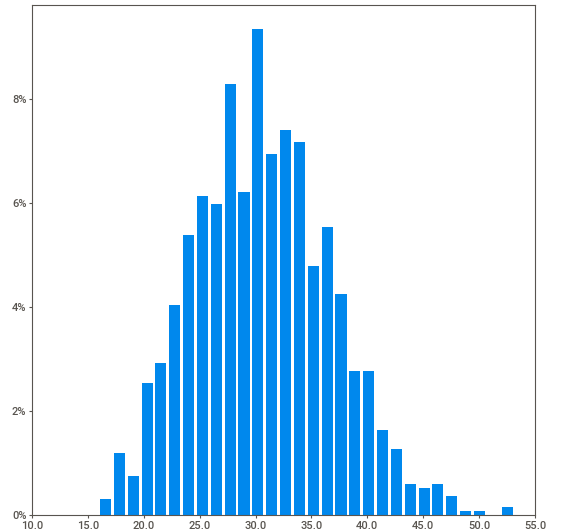
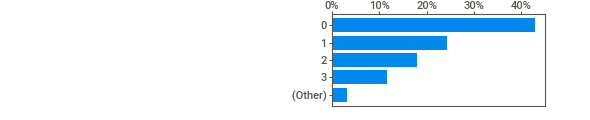
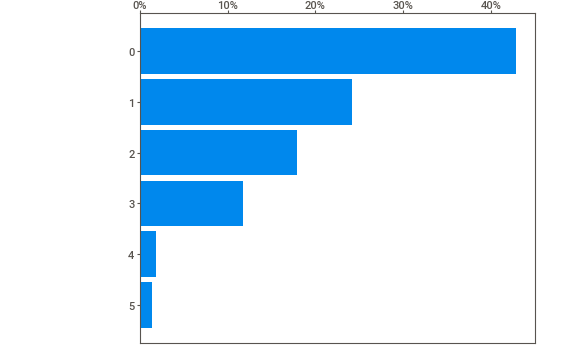
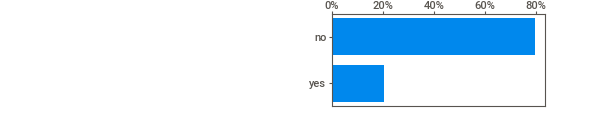
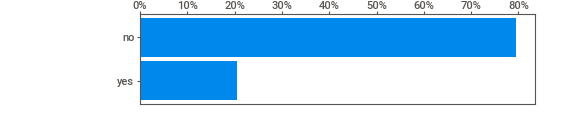
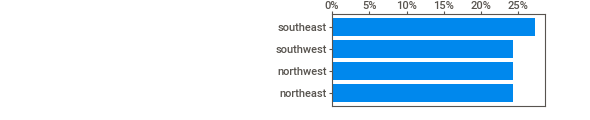
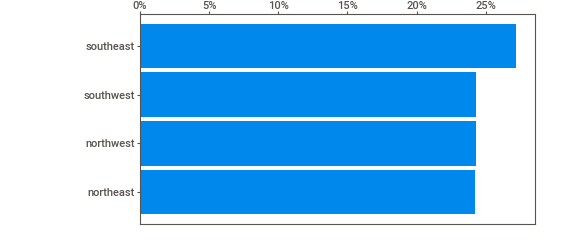
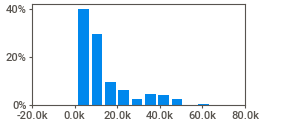
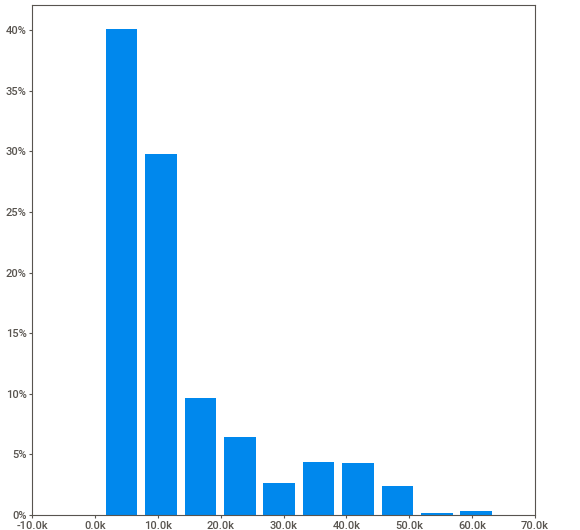
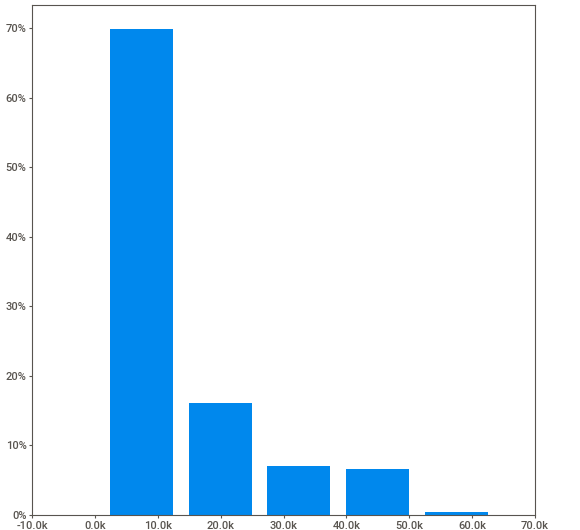
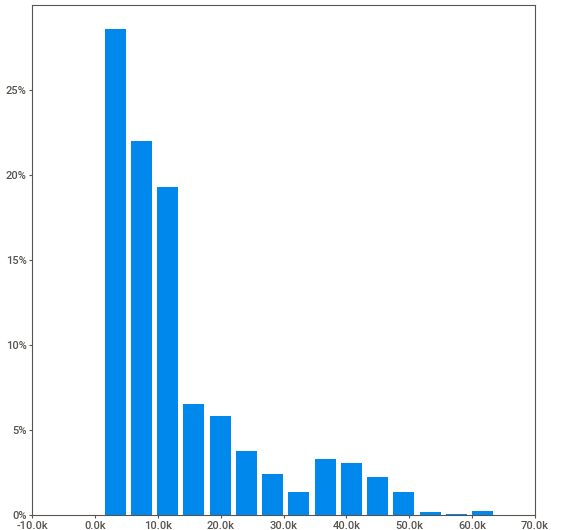
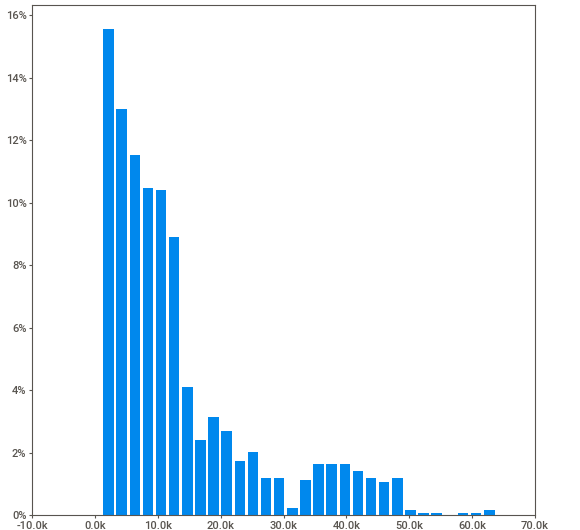
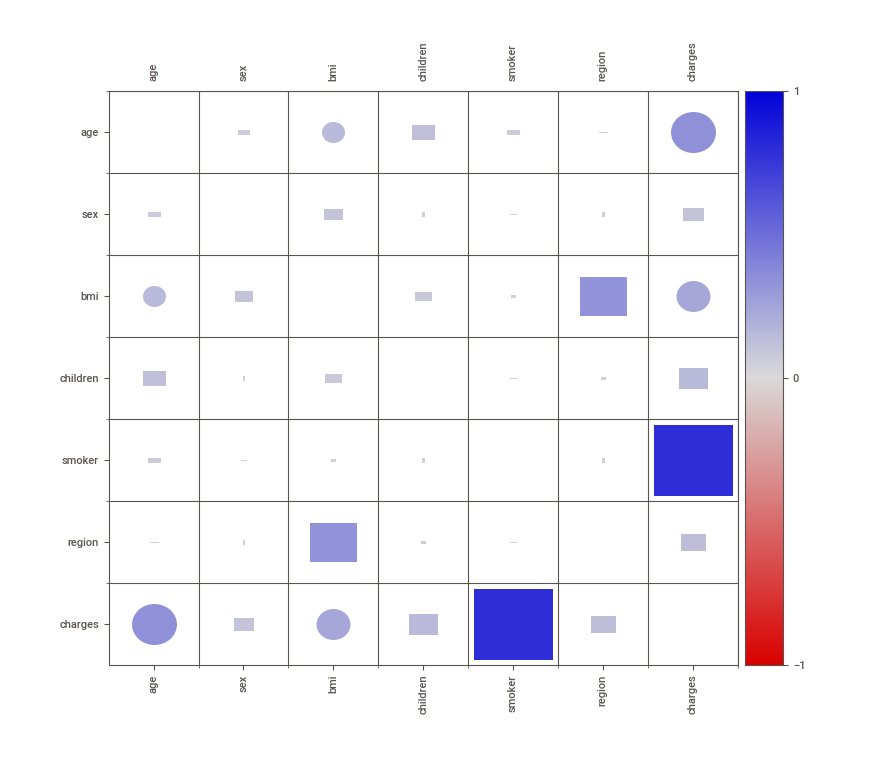
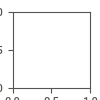

In [9]:
# Using Automated library for univariate analysis
import sweetviz as sv
my_report = sv.analyze(insurance_dataset)
my_report.show_notebook()

In [10]:
insurance_dataset['children'].unique

<bound method Series.unique of 0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64>

Observations:
1. age column - numerical column - ranging between 18 and 64
2. sex column - categorical column - Total counts of Male and Female are similar
3. bmi column - numerical column -ranging between 16 and 53.1, data is normally distributed
4. children column - numerical column ranging between 0 to 5
5. smoker column - categorical column - nearly 80% dont smoke
6. religion column - categorical column with 4 regions
7. charges column - Individual medical costs billed by health insurance ranging between 1122 and 63770. Around 80% have been billed less than 20000 approximately

### Bivariate Analysis

<AxesSubplot:xlabel='age', ylabel='charges'>

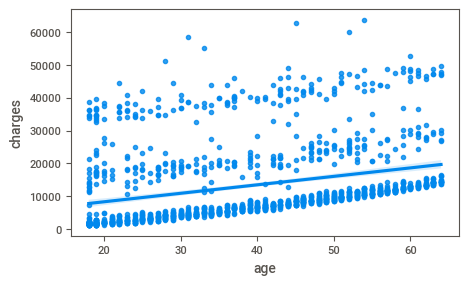

In [11]:
#Analyzing age column with respect to target charges column
plt.rcParams["figure.figsize"] = (5,3)
sns.regplot(x= 'age',y='charges', data=insurance_dataset)

Observations:
When Age increases, charges also increases.

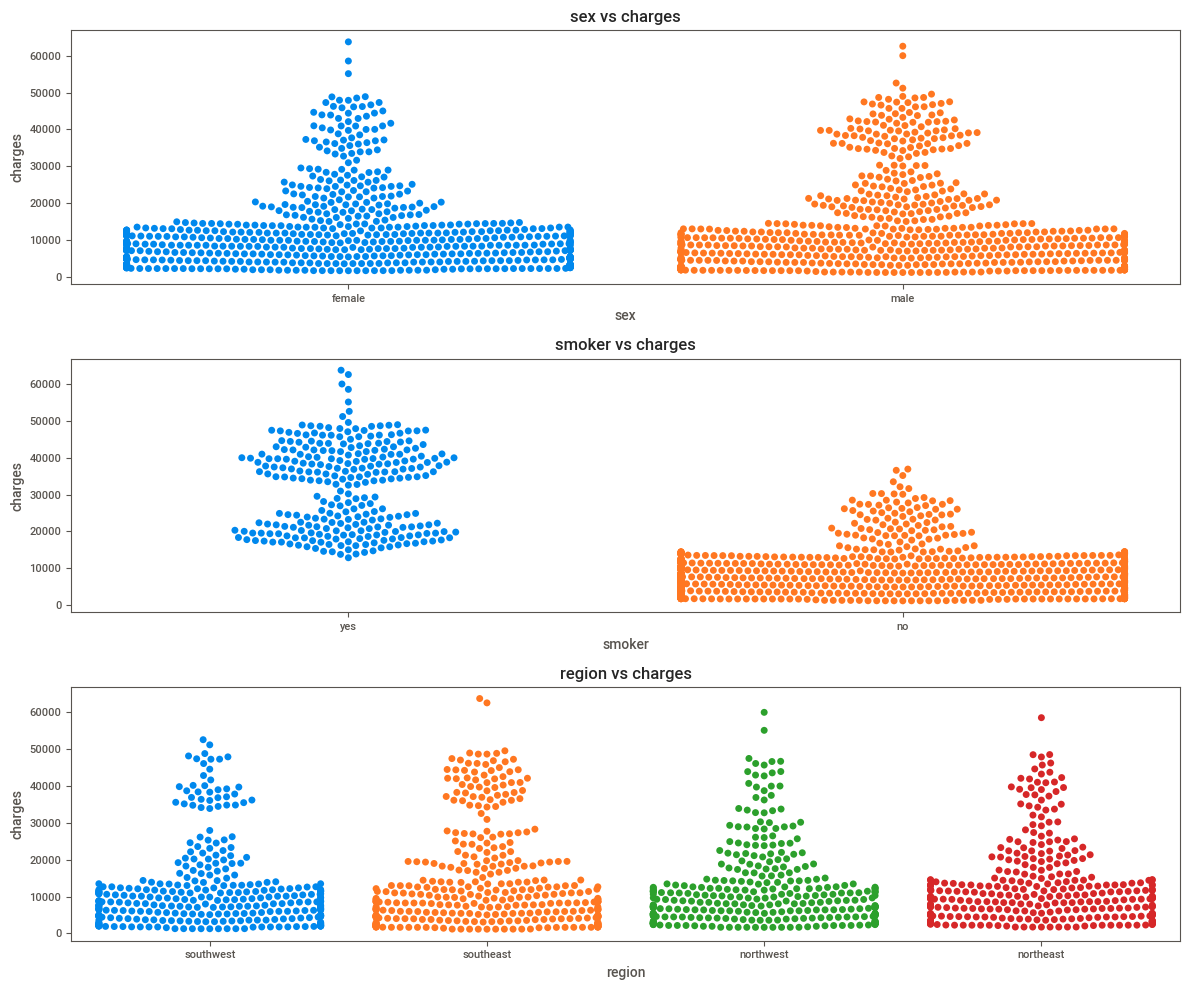

In [12]:
#Analyzing sex,smoker and region with respect to target charges
plt.rcParams["figure.figsize"] = (12,10)
fig, axes = plt.subplots(3)
sns.swarmplot(x= 'sex',y='charges', data=insurance_dataset, ax=axes[0]).set(title='sex vs charges')
sns.swarmplot(x= 'smoker',y='charges', data=insurance_dataset,ax=axes[1]).set(title='smoker vs charges')
sns.swarmplot(x= 'region',y='charges', data=insurance_dataset,ax=axes[2]).set(title='region vs charges')
plt.tight_layout()

Observations:

1. Both Male and Female seems to be equally distributed with respect to charges.

2. smokers are charged more when compared to Non smokers.

3. All the 4 regions seems to be equally distributed with respect to charges.

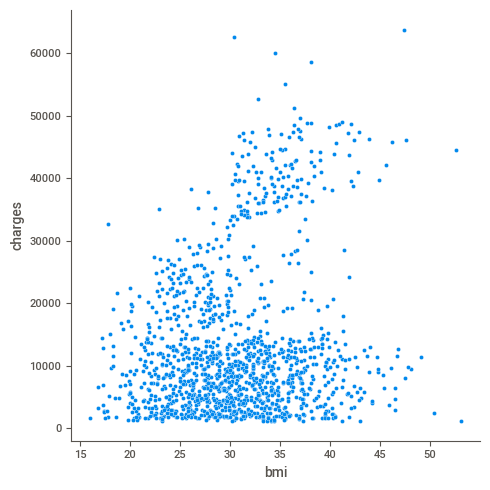

In [13]:
#Analyzing age column with respect to target charges column
plt.rcParams["figure.figsize"] = (5,3)
sns.relplot(x= 'bmi',y='charges', data=insurance_dataset)

Observations:
When bmi increases, charges also increases.

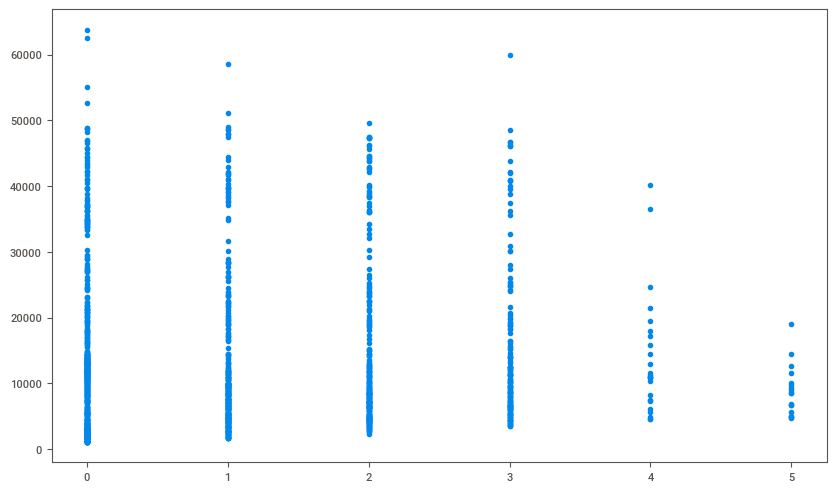

In [14]:
#Analyzing children column with respect to target charges column
plt.figure(figsize =(10, 6))
plt.scatter(insurance_dataset['children'],insurance_dataset['charges'])

Observations:
When there are 4 or 5 children, charged amount is low

### Multivariate Analysis

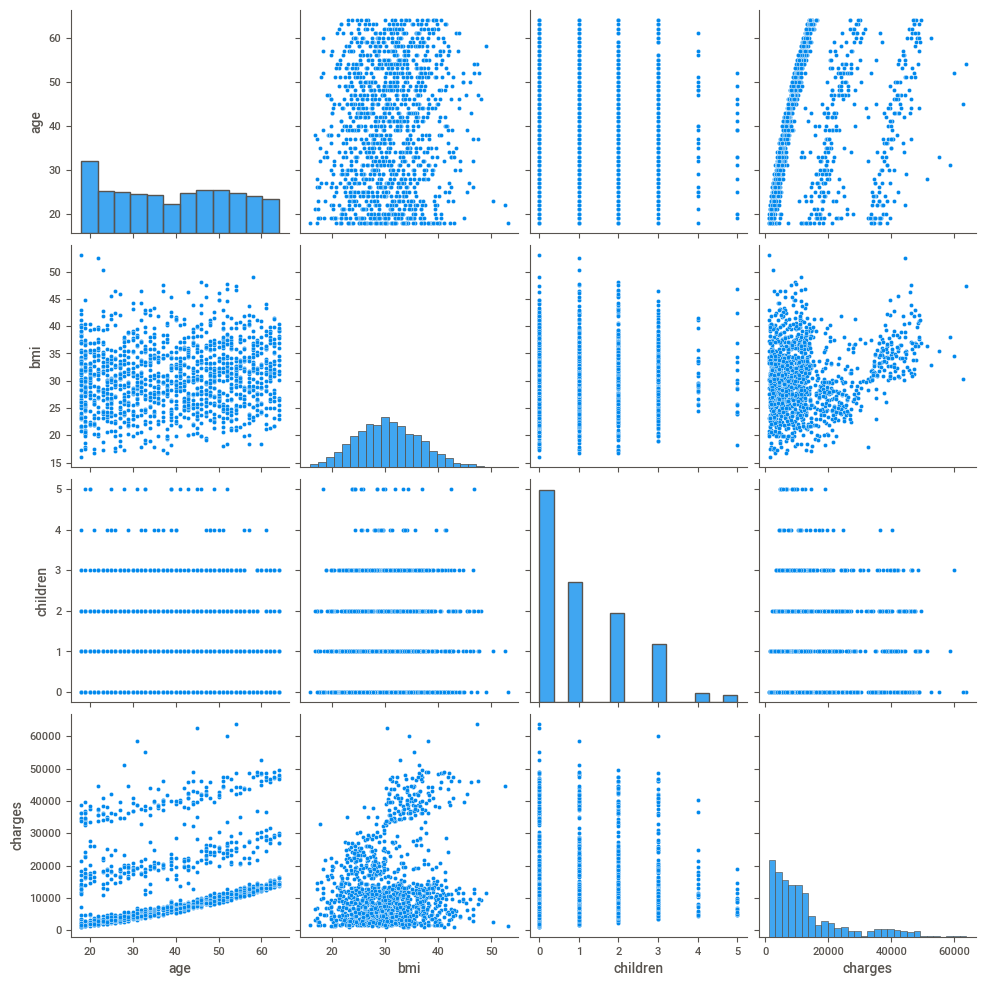

In [15]:
#Analyzing age and bmi columns with respect to charges with hue as categorical columns
sns.pairplot(insurance_dataset)

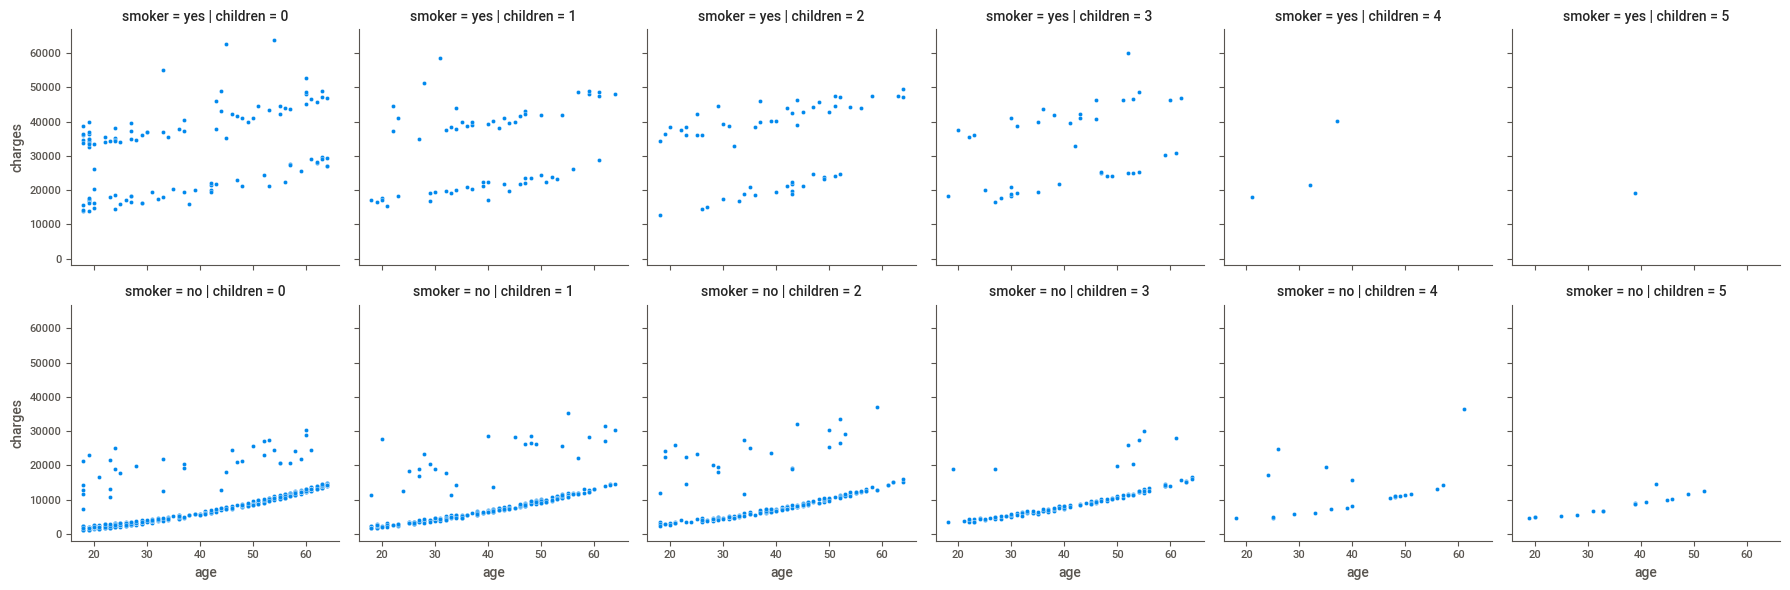

In [16]:
g = sns.FacetGrid(insurance_dataset, col="children",  row="smoker")
g.map(sns.scatterplot, "age", "charges")

Observation:
    Smokers who have less than 3 children charged more when compared to smokers having 4 or 5 children

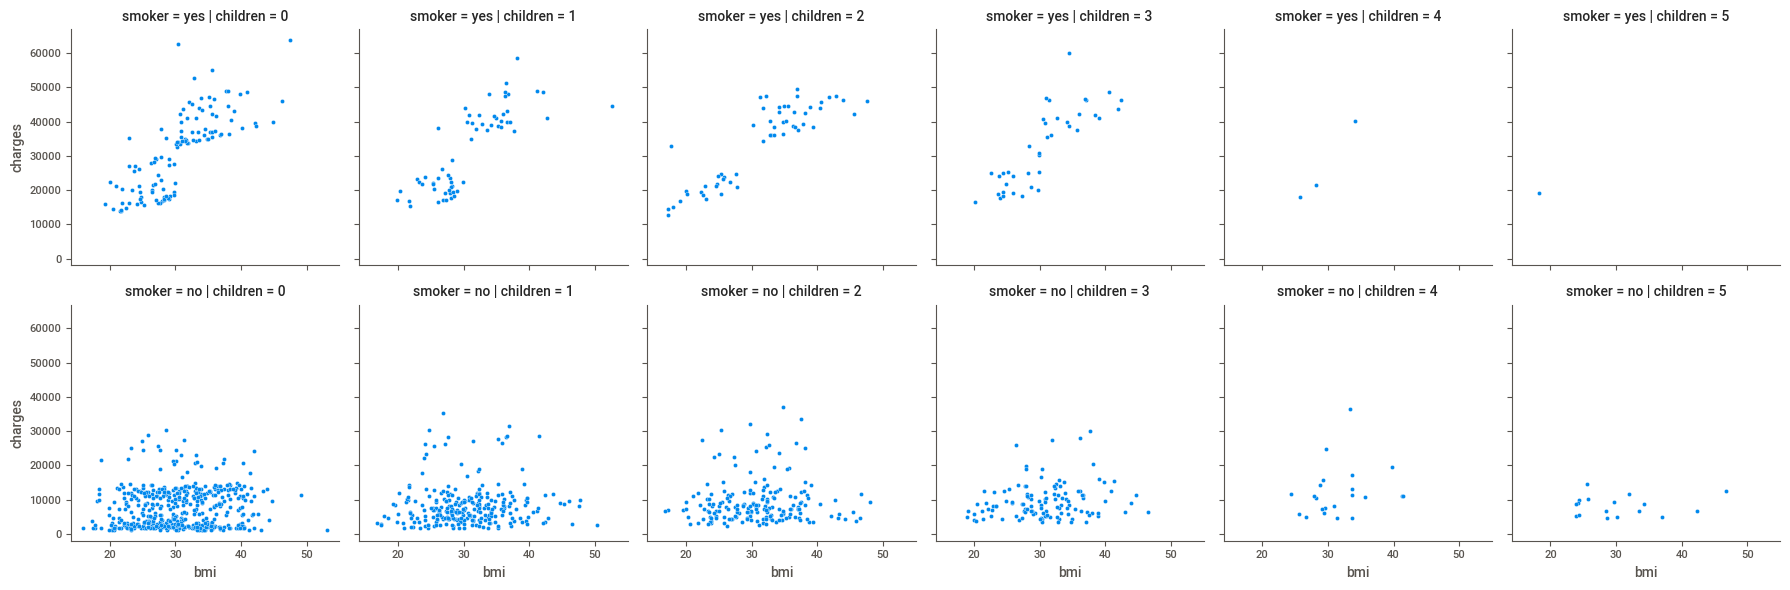

In [17]:
g = sns.FacetGrid(insurance_dataset, col="children",  row="smoker")
g.map(sns.scatterplot, "bmi", "charges")

Observation:
    When bmi of the smoker increases, charges is too high

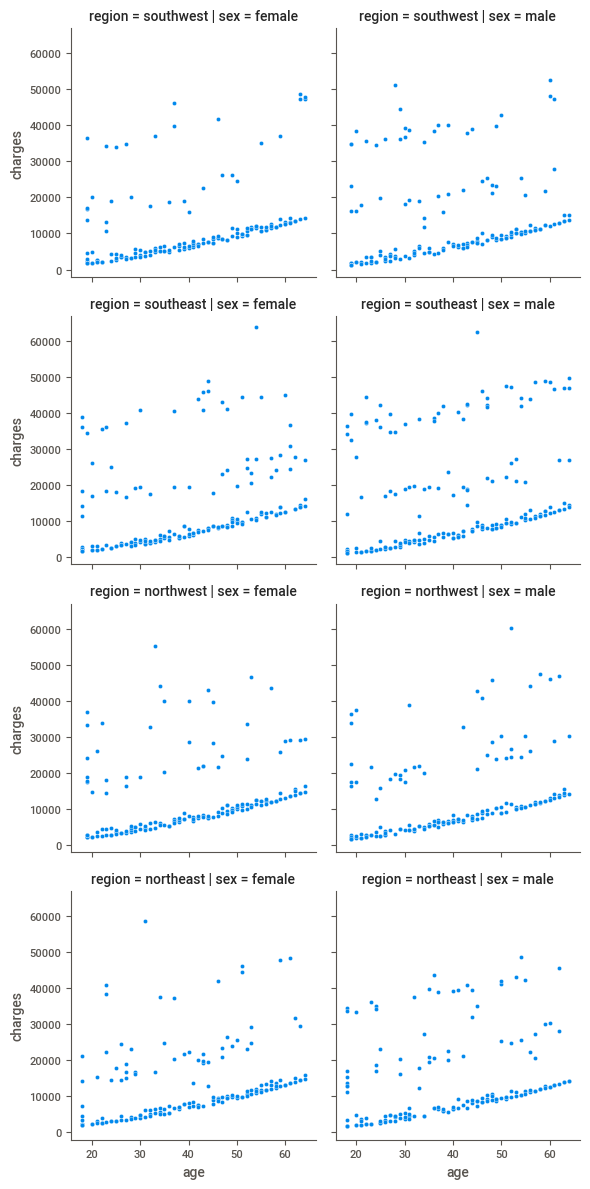

In [18]:
g = sns.FacetGrid(insurance_dataset, col="sex",  row="region")
g.map(sns.scatterplot, "age", "charges")

Observation:
    region and sex columns are evenly distributed with respect to age and charges columm

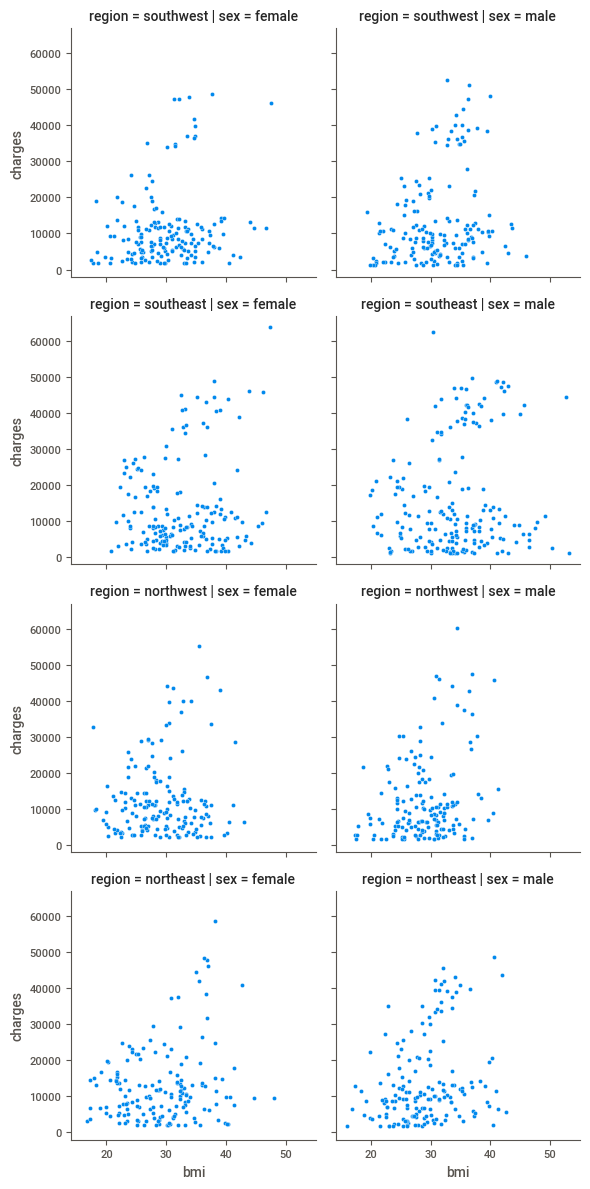

In [19]:
g = sns.FacetGrid(insurance_dataset, col="sex",  row="region")
g.map(sns.scatterplot, "bmi", "charges")

Observation:
    region and sex columns are evenly distributed with respect to bmi and charges columm

### Data Preprocessing and Feature Engineering

In [20]:
# step 1 : Check for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Observation : There are no missing values

In [21]:
# step 2:  Check for duplicate rows and remove duplicates
insurance_dataset[insurance_dataset.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [22]:
insurance_dataset[insurance_dataset['charges'] == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [23]:
insurance_dataset.drop_duplicates(inplace=True)
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [24]:
# Reset index as duplicate rows are removed
insurance_dataset.reset_index(drop=True,inplace=True)
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1332,50,male,30.97,3,no,northwest,10600.5483
1333,18,female,31.92,0,no,northeast,2205.9808
1334,18,female,36.85,0,no,southeast,1629.8335
1335,21,female,25.80,0,no,southwest,2007.9450
1336,61,female,29.07,0,yes,northwest,29141.3603


In [25]:
insurance_dataset[insurance_dataset.duplicated()]

,age,sex,bmi,children,smoker,region,charges


Now there are no duplicate rows in insurance_dataset

In [26]:
#step 3 : Convert categorical variable into numerical
# sex, smoker and region are categorical columns.
ins_df = pd.get_dummies(insurance_dataset,columns=['sex','smoker','region'],drop_first=True)

In [27]:
ins_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [28]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


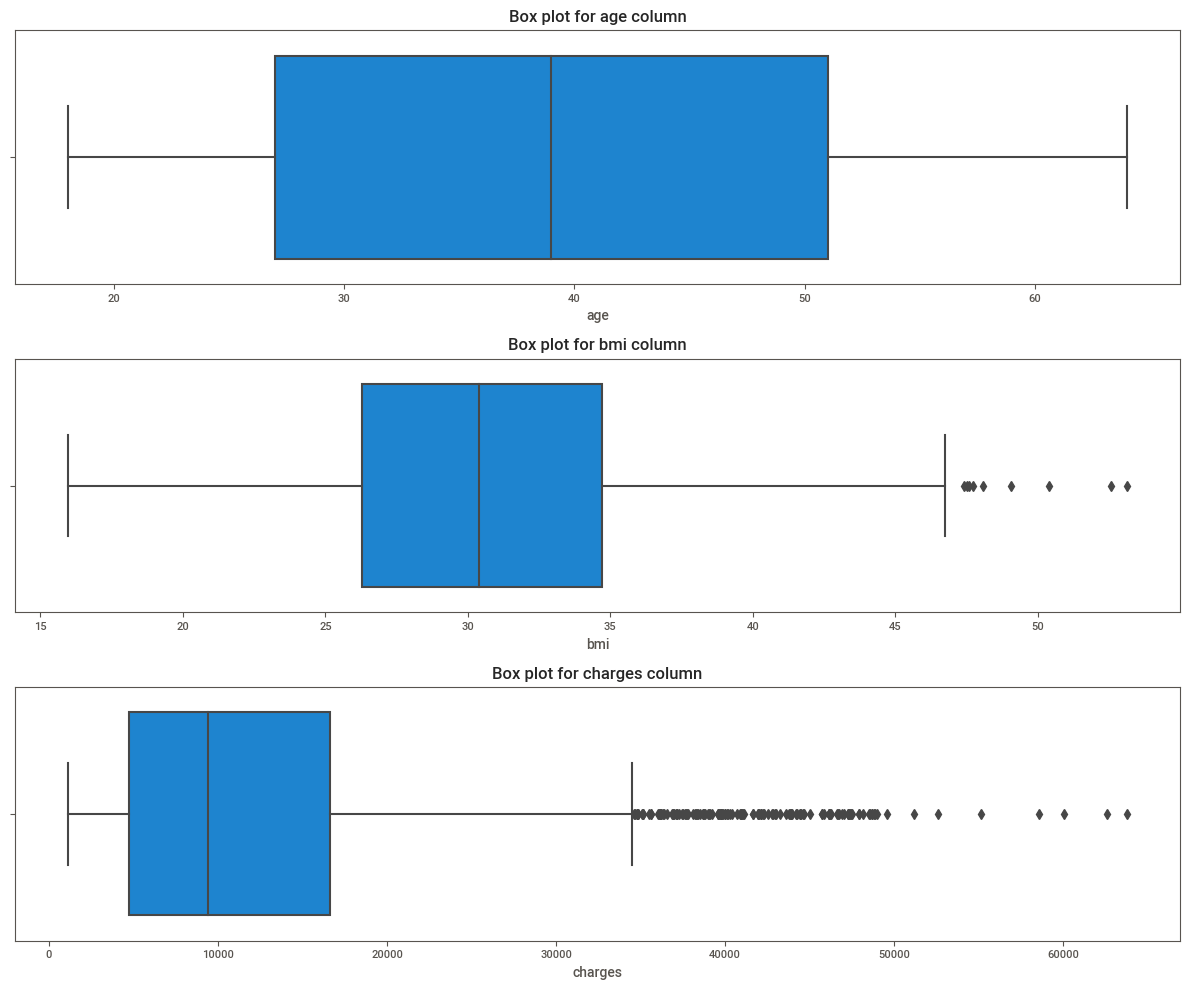

In [29]:
#step 4 : Handle outliers
plt.rcParams["figure.figsize"] = (12,10)
fig, axes = plt.subplots(3)
sns.boxplot(x= 'age',data=insurance_dataset, ax=axes[0]).set(title='Box plot for age column')
sns.boxplot(x= 'bmi',data=insurance_dataset, ax=axes[1]).set(title='Box plot for bmi column')
sns.boxplot(x= 'charges',data=insurance_dataset, ax=axes[2]).set(title='Box plot for charges column')
plt.tight_layout()

There are few outliers in bmi column and many outliers in charges column

In [30]:
#Outlier detection using IQR:
Q1 = np.percentile(ins_df['bmi'],25)
Q3 = np.percentile(ins_df['bmi'],75)
IQR = Q3- Q1
lower_limit= Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR

In [31]:
lower_limit

13.674999999999994

In [32]:
upper_limit

47.31500000000001

In [33]:
# Here are the outlier rows for bmi column
ins_df[(ins_df['bmi'] <= 13.67) | (ins_df['bmi'] >= 47.32)]

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
116,58,49.06,0,11381.32540,1,0,0,1,0
286,46,48.07,2,9432.92530,0,0,0,0,0
401,47,47.52,1,8083.91980,1,0,0,1,0
543,54,47.41,0,63770.42801,0,1,0,1,0
846,23,50.38,1,2438.05520,1,0,0,1,0
859,37,47.60,2,46113.51100,0,1,0,0,1
1046,22,52.58,1,44501.39820,1,1,0,1,0
1087,52,47.74,1,9748.91060,1,0,0,1,0
1316,18,53.13,0,1163.46270,1,0,0,1,0


In [34]:
# Step 5 Scaling the continous variable
scaler = StandardScaler()
ins_df.iloc[:,:-6]= scaler.fit_transform(ins_df.iloc[:,:-6])
ins_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,16884.92400,0,1,0,0,1
1,-1.511647,0.509422,-0.079442,1725.55230,1,0,0,1,0
2,-0.799350,0.383155,1.580143,4449.46200,1,0,0,1,0
3,-0.443201,-1.305052,-0.909234,21984.47061,1,0,1,0,0
4,-0.514431,-0.292456,-0.909234,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1332,0.767704,0.050269,1.580143,10600.54830,1,0,1,0,0
1333,-1.511647,0.206053,-0.909234,2205.98080,0,0,0,0,0
1334,-1.511647,1.014490,-0.909234,1629.83350,0,0,0,1,0
1335,-1.297958,-0.797524,-0.909234,2007.94500,0,0,0,0,1


In [35]:
# Step 6 Balacing the data
#THis step is performed specially for classification

### Feature Selection:

In [36]:
#Step 1 Dropping the unwanted variables
# There is no unwanted variable in the dataset
ins_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,16884.92400,0,1,0,0,1
1,-1.511647,0.509422,-0.079442,1725.55230,1,0,0,1,0
2,-0.799350,0.383155,1.580143,4449.46200,1,0,0,1,0
3,-0.443201,-1.305052,-0.909234,21984.47061,1,0,1,0,0
4,-0.514431,-0.292456,-0.909234,3866.85520,1,0,1,0,0


<AxesSubplot:>

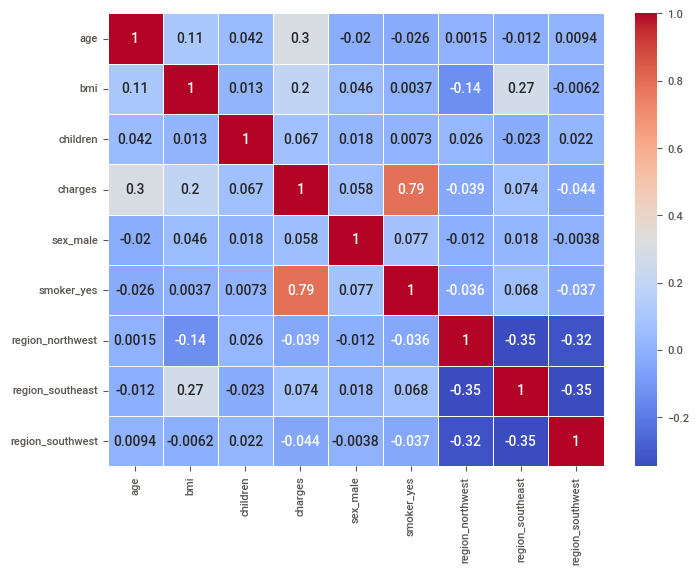

In [37]:
## Step 2 Checking the correlation
plt.rcParams["figure.figsize"] = (8,6)
sns.heatmap(ins_df.corr(),annot=True, linewidths= .6,cmap="coolwarm")

Observation : smoker columns, age and bmi columns are highly correlated with Target charges

### Model Creation

In [38]:
# Independent and dependent variable creation
X = ins_df.drop(['charges'],axis="columns")
y = ins_df['charges']

In [75]:
# Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [76]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
161,-1.511647,1.014490,-0.909234,0,1,0,1,0
1032,-1.511647,-1.491993,-0.909234,1,1,0,0,0
151,0.625245,-0.157990,-0.909234,1,0,0,1,0
759,-1.226729,0.642248,0.750351,0,0,0,0,0
362,-1.440418,-1.469855,-0.909234,0,1,0,0,1
...,...,...,...,...,...,...,...,...
278,1.408772,0.184735,0.750351,1,0,0,1,0
432,0.197866,-0.617143,-0.909234,1,0,0,0,1
1283,1.551231,0.924299,-0.079442,1,1,0,0,1
1265,1.123853,-0.026803,-0.909234,0,0,0,0,1


In [77]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
936,-0.015823,-1.055798,3.239729,0,0,1,0,0
728,0.126637,0.888223,-0.079442,0,0,0,1,0
1306,-0.514431,-0.417083,2.409936,1,1,1,0,0
924,0.767704,0.237210,0.750351,1,0,0,0,0
137,-1.226729,-0.900014,-0.909234,1,0,1,0,0
...,...,...,...,...,...,...,...,...
224,0.197866,-0.987745,-0.909234,1,1,0,1,0
1244,-0.799350,-1.043499,3.239729,1,0,0,0,1
1086,1.266312,0.143739,-0.909234,1,0,1,0,0
912,0.340326,-0.518753,-0.079442,0,0,0,0,1


##### Model creation using Linear

In [78]:
# Creating model and checking accuracy
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)
y_predict_model_linear = model_linear.predict(X_test)

In [79]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
print("Training Accuracy :",model_linear.score(X_train,y_train)*100)
print("Testing Accuracy :",model_linear.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_linear)
#Adj r2 = 1- (1-R2)* (n-1)/ (n-p-1) Where n is the sample size and p is the number of independent variables. Adjusted R2 requires number of independent variables as well.
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)
print("Mean Squared error :",mean_squared_error(y_test,y_predict_model_linear))
print("Root Mean Squared error :",math.sqrt(mean_squared_error(y_test,y_predict_model_linear)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict_model_linear))

Training Accuracy : 75.33757142363804
Testing Accuracy : 73.68093088415684
r2 Score : 0.7368093088415684
Adjusted r2 Score : 0.7286798666436245
Mean Squared error : 47165037.12122703
Root Mean Squared error : 6867.68062166748
Mean Absolute Error: 4677.733000211809


In [80]:
from sklearn import linear_model
model_lasso = linear_model.Lasso(alpha=56, max_iter=100, tol=0.2)
model_lasso.fit(X_train,y_train)
model_lasso.score(X_test,y_test)

0.7332122225331867

##### Model creation using SVR

In [81]:
#Model creation using SVR
from sklearn.svm import SVR
model_svr = SVR(kernel='rbf',C=1000)
model_svr.fit(X_train,y_train)
y_predict_model_svr= model_svr.predict(X_test)

In [82]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
print("Training Accuracy :",model_svr.score(X_train,y_train)*100)
print("Testing Accuracy :",model_svr.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_svr)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)

Training Accuracy : 58.4322892131081
Testing Accuracy : 52.475967996635795
r2 Score : 0.524759679966358
Adjusted r2 Score : 0.5100804422819212


##### Model creation using Decision Tree

In [83]:
#Model creation using Decision Tree
from sklearn.tree import DecisionTreeRegressor
model_decision_tree = DecisionTreeRegressor()
model_decision_tree.fit(X_train,y_train)
y_predict_model_decisiontree= model_decision_tree.predict(X_test)
print("Training Accuracy :",model_decision_tree.score(X_train,y_train)*100)
print("Testing Accuracy :",model_decision_tree.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_decisiontree)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)

Training Accuracy : 99.82274533375055
Testing Accuracy : 78.31202889000323
r2 Score : 0.7831202889000324
Adjusted r2 Score : 0.7764213016845893


##### Model creation using Random Forest Regressor (Bagging Ensemble technique)

In [84]:
from sklearn.ensemble import RandomForestRegressor
model_RF_regressor = RandomForestRegressor()
model_RF_regressor.fit(X_train,y_train)
y_predict_model_RF_regressor = model_RF_regressor.predict(X_test)
print("Training Accuracy :",model_RF_regressor.score(X_train,y_train)*100)
print("Testing Accuracy :",model_RF_regressor.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_RF_regressor)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)

Training Accuracy : 97.62098940047204
Testing Accuracy : 84.64587690700642
r2 Score : 0.8464587690700642
Adjusted r2 Score : 0.8417161827865141


##### Model creation using Adaboost Regressor (Boosting Ensemble technique)

In [85]:
from sklearn.ensemble import AdaBoostRegressor
model_adaboost = AdaBoostRegressor()
model_adaboost.fit(X_train,y_train)
y_predict_model_adaboost = model_adaboost.predict(X_test)
print("Training Accuracy :",model_adaboost.score(X_train,y_train)*100)
print("Testing Accuracy :",model_adaboost.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_adaboost)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)

Training Accuracy : 83.77607022541386
Testing Accuracy : 83.35742341571931
r2 Score : 0.8335742341571931
Adjusted r2 Score : 0.8284336699612763


##### Model creation using Gradient Boosting Regressor (Boosting Ensemble technique)

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
model_GB_regressor = GradientBoostingRegressor()
model_GB_regressor.fit(X_train,y_train)
y_predict_model_GB_regressor = model_GB_regressor.predict(X_test)
print("Training Accuracy :",model_GB_regressor.score(X_train,y_train)*100)
print("Testing Accuracy :",model_GB_regressor.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_GB_regressor)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)

Training Accuracy : 90.38567843446604
Testing Accuracy : 85.71880781734585
r2 Score : 0.8571880781734585
Adjusted r2 Score : 0.8527768991209013


##### Model creation using XGBoost Regressor (Boosting Ensemble technique)

In [87]:
from xgboost import XGBRegressor
model_XGB_regressor = XGBRegressor()
model_XGB_regressor.fit(X_train,y_train)
y_predict_model_XGB_regressor = model_XGB_regressor.predict(X_test)
print("Training Accuracy :",model_XGB_regressor.score(X_train,y_train)*100)
print("Testing Accuracy :",model_XGB_regressor.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_XGB_regressor)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)

Training Accuracy : 99.38385126956514
Testing Accuracy : 82.10379867411277
r2 Score : 0.8210379867411276
Adjusted r2 Score : 0.8155102025478034
